<a href="https://colab.research.google.com/github/sadullahozcan/sarcopenia-eda-analysis-2/blob/main/EDA_08_log_reg_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import io

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import statsmodels.api as sm

plt.rc("font", size = 14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)

In [ ]:
from google import colab
colab.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/PROJECTS/Sarcopenia_Project/Data_Set_Files_2/sarcopenia-data-set_columns_corrected_10.xlsx')

In [ ]:
df.columns

Index(['Gender', 'Age', 'Age_Group', 'Weight', 'DM_Type2', 'OP',
       'Total_Duration_of_Chronic_Diseases', 'Education', 'Chronic_Diseases',
       'Number_of_Drug_Used', 'Job', 'Total_Number_of_Chronic_Diseases',
       'Work_Status', 'Exercise_Status', 'AT', 'CST', 'Gait_Speed', 'Grip_Str',
       'STAR', 'Waist_Hip_Ratio', 'BMI', 'Sarcopenia'],
      dtype='object')

In [ ]:
df.head(n=5)

,Gender,Age,Age_Group,Weight,DM_Type2,OP,Total_Duration_of_Chronic_Diseases,Education,Chronic_Diseases,Number_of_Drug_Used,...,Work_Status,Exercise_Status,AT,CST,Gait_Speed,Grip_Str,STAR,Waist_Hip_Ratio,BMI,Sarcopenia
0,M,74.0,AGE 60-80,88.0,1,1,5.0,University,"DM_Type2, KAH,OP",3,...,not working,3-4/week,50.2,12.5,1.21,32.0,1.81,1.00,27.8,0
1,M,62.0,AGE 60-80,105.0,0,0,0.0,Secondary School,No_Disease,0,...,not working,0,49.0,12.1,1.42,47.0,1.38,1.12,35.5,1
2,M,65.0,AGE 60-80,89.0,0,0,0.0,University,No_Disease,0,...,not working,3-4/week,37.3,8.7,1.18,33.0,1.20,0.96,31.2,0
3,F,71.0,AGE 60-80,68.0,0,1,12.0,University,"Asthma,OP",1,...,not working,1-2/week,29.5,8.3,1.23,25.0,1.11,1.03,26.6,0
4,F,61.0,AGE 60-80,80.0,0,0,1.5,University,Asthma,1,...,not working,1-2/week,39.5,11.0,1.31,31.0,1.26,0.97,31.3,0


# **Final Arrangements on data frame**

In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Age_Group,0
Weight,0
DM_Type2,0
OP,0
Total_Duration_of_Chronic_Diseases,0
Education,0
Chronic_Diseases,0
Number_of_Drug_Used,0


# **Logistic Regression Analysis**

#Cleaning columns not to be used in logistic regression model.

In [ ]:
df.columns

Index(['Gender', 'Age', 'Age_Group', 'Weight', 'DM_Type2', 'OP',
       'Total_Duration_of_Chronic_Diseases', 'Education', 'Chronic_Diseases',
       'Number_of_Drug_Used', 'Job', 'Total_Number_of_Chronic_Diseases',
       'Work_Status', 'Exercise_Status', 'AT', 'CST', 'Gait_Speed', 'Grip_Str',
       'STAR', 'Waist_Hip_Ratio', 'BMI', 'Sarcopenia'],
      dtype='object')

In [ ]:
df.drop("Age",axis=1,inplace=True)

In [ ]:
df.drop("Total_Duration_of_Chronic_Diseases",axis=1,inplace=True)

In [ ]:
df.drop("Number_of_Drug_Used",axis=1,inplace=True)

In [ ]:
df.head()

,Gender,Age_Group,Weight,DM_Type2,OP,Education,Chronic_Diseases,Job,Total_Number_of_Chronic_Diseases,Work_Status,Exercise_Status,AT,CST,Gait_Speed,Grip_Str,STAR,Waist_Hip_Ratio,BMI,Sarcopenia
0,M,AGE 60-80,88.0,1,1,University,"DM_Type2, KAH,OP",numbers_below_ten,3,not working,3-4/week,50.2,12.5,1.21,32.0,1.81,1.00,27.8,0
1,M,AGE 60-80,105.0,0,0,Secondary School,No_Disease,driver,0,not working,0,49.0,12.1,1.42,47.0,1.38,1.12,35.5,1
2,M,AGE 60-80,89.0,0,0,University,No_Disease,security_personel,0,not working,3-4/week,37.3,8.7,1.18,33.0,1.20,0.96,31.2,0
3,F,AGE 60-80,68.0,0,1,University,"Asthma,OP",white_collar_below_55,4,not working,1-2/week,29.5,8.3,1.23,25.0,1.11,1.03,26.6,0
4,F,AGE 60-80,80.0,0,0,University,Asthma,teacher,3,not working,1-2/week,39.5,11.0,1.31,31.0,1.26,0.97,31.3,0


In [ ]:
df.to_excel('/content/drive/MyDrive/PROJECTS/Sarcopenia_Project/Data_Set_Files_2/sarcopenia-data-set_columns_corrected_11.xlsx', index=False)

In [ ]:
df_logit = df.copy()

In [ ]:
df_logit.columns

Index(['Gender', 'Age_Group', 'Weight', 'DM_Type2', 'OP', 'Education',
       'Chronic_Diseases', 'Job', 'Total_Number_of_Chronic_Diseases',
       'Work_Status', 'Exercise_Status', 'AT', 'CST', 'Gait_Speed', 'Grip_Str',
       'STAR', 'Waist_Hip_Ratio', 'BMI', 'Sarcopenia'],
      dtype='object')

In [ ]:
df_logit = df_logit.drop("Weight",axis=1)

In [ ]:
#Encode categorical variables (for logistic regression especially)
df_logit = pd.get_dummies(df_logit, drop_first=True)

In [ ]:
df_logit.head()

,DM_Type2,OP,Total_Number_of_Chronic_Diseases,AT,CST,Gait_Speed,Grip_Str,STAR,Waist_Hip_Ratio,BMI,...,Job_retired,Job_security_personel,Job_self-employment,Job_teacher,Job_white_collar_below_55,Job_worker,Work_Status_unknown,Work_Status_working,Exercise_Status_1-2/week,Exercise_Status_3-4/week
0,1,1,3,50.2,12.5,1.21,32.0,1.81,1.00,27.8,...,False,False,False,False,False,False,False,False,False,True
1,0,0,0,49.0,12.1,1.42,47.0,1.38,1.12,35.5,...,False,False,False,False,False,False,False,False,False,False
2,0,0,0,37.3,8.7,1.18,33.0,1.20,0.96,31.2,...,False,True,False,False,False,False,False,False,False,True
3,0,1,4,29.5,8.3,1.23,25.0,1.11,1.03,26.6,...,False,False,False,False,True,False,False,False,True,False
4,0,0,3,39.5,11.0,1.31,31.0,1.26,0.97,31.3,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
df_logit.columns.to_list()

['DM_Type2',
 'OP',
 'Total_Number_of_Chronic_Diseases',
 'AT',
 'CST',
 'Gait_Speed',
 'Grip_Str',
 'STAR',
 'Waist_Hip_Ratio',
 'BMI',
 'Sarcopenia',
 'Gender_M',
 'Age_Group_AGE 60-80',
 'Age_Group_AGE 80-100',
 'Education_Primary School',
 'Education_Secondary School',
 'Education_University',
 'Education_illiterate',
 'Chronic_Diseases_Asthma,OP',
 'Chronic_Diseases_COPD',
 'Chronic_Diseases_COPD,OP',
 'Chronic_Diseases_DM_Type2',
 'Chronic_Diseases_DM_Type2, Asthma',
 'Chronic_Diseases_DM_Type2, Asthma, COPD,OP',
 'Chronic_Diseases_DM_Type2, Asthma,OP',
 'Chronic_Diseases_DM_Type2, COPD',
 'Chronic_Diseases_DM_Type2, COPD,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Asthma',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, COPD',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, COPD,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Hipotiroidi',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Hipot

In [ ]:
df_logit = df_logit.drop(['Chronic_Diseases_Asthma,OP',
 'Chronic_Diseases_COPD,OP',
 'Chronic_Diseases_DM_Type2',
 'Chronic_Diseases_DM_Type2, Asthma',
 'Chronic_Diseases_DM_Type2, Asthma, COPD,OP',
 'Chronic_Diseases_DM_Type2, Asthma,OP',
 'Chronic_Diseases_DM_Type2, COPD',
 'Chronic_Diseases_DM_Type2, COPD,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Asthma',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, COPD',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, COPD,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Hipotiroidi',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Hipotiroidi, Asthma',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Hipotiroidi, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Hipotiroidi, COPD',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, Hipotiroidi,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, KAH',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, KAH, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, KAH, COPD,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, KAH, Hipotiroidi',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, KAH, Hipotiroidi, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, KAH, Hipotiroidi,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia, KAH,OP',
 'Chronic_Diseases_DM_Type2, Dyslipidemia,OP',
 'Chronic_Diseases_DM_Type2, Hipotiroidi',
 'Chronic_Diseases_DM_Type2, Hipotiroidi, Asthma',
 'Chronic_Diseases_DM_Type2, Hipotiroidi, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Hipotiroidi, COPD',
 'Chronic_Diseases_DM_Type2, Hipotiroidi,OP',
  'Chronic_Diseases_DM_Type2, Insulin',
 'Chronic_Diseases_DM_Type2, Insulin, Asthma',
 'Chronic_Diseases_DM_Type2, Insulin, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, Asthma',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, Hipotiroidi',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, Hipotiroidi, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, Hipotiroidi,OP',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, KAH',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, KAH, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, KAH, Hipotiroidi',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, KAH, Hipotiroidi, Asthma',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, KAH, Hipotiroidi,OP',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia, KAH,OP',
 'Chronic_Diseases_DM_Type2, Insulin, Dyslipidemia,OP',
 'Chronic_Diseases_DM_Type2, Insulin, Hipotiroidi',
 'Chronic_Diseases_DM_Type2, Insulin, Hipotiroidi, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Insulin, Hipotiroidi,OP',
 'Chronic_Diseases_DM_Type2, Insulin, KAH',
 'Chronic_Diseases_DM_Type2, Insulin, KAH, Asthma',
 'Chronic_Diseases_DM_Type2, Insulin, KAH, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Insulin, KAH, COPD',
 'Chronic_Diseases_DM_Type2, Insulin, KAH, COPD,OP',
 'Chronic_Diseases_DM_Type2, Insulin, KAH, Hipotiroidi, Asthma,OP',
 'Chronic_Diseases_DM_Type2, Insulin, KAH, Hipotiroidi,OP',
 'Chronic_Diseases_DM_Type2, Insulin, KAH,OP',
 'Chronic_Diseases_DM_Type2, Insulin,OP',
 'Chronic_Diseases_DM_Type2, KAH',
 'Chronic_Diseases_DM_Type2, KAH, Asthma,OP',
 'Chronic_Diseases_DM_Type2, KAH, COPD',
 'Chronic_Diseases_DM_Type2, KAH, Hipotiroidi',
 'Chronic_Diseases_DM_Type2, KAH, Hipotiroidi,OP',
 'Chronic_Diseases_DM_Type2, KAH,OP',
 'Chronic_Diseases_DM_Type2,OP',
 'Chronic_Diseases_Dyslipidemia, Asthma',
 'Chronic_Diseases_Dyslipidemia, Asthma,OP',
 'Chronic_Diseases_Dyslipidemia, COPD',
 'Chronic_Diseases_Dyslipidemia, COPD,OP',
 'Chronic_Diseases_Dyslipidemia, Hipotiroidi',
 'Chronic_Diseases_Dyslipidemia, Hipotiroidi, Asthma, COPD',
 'Chronic_Diseases_Dyslipidemia, Hipotiroidi, Asthma,OP',
 'Chronic_Diseases_Dyslipidemia, Hipotiroidi, COPD,OP',
 'Chronic_Diseases_Dyslipidemia, Hipotiroidi,OP',
 'Chronic_Diseases_Dyslipidemia, KAH',
 'Chronic_Diseases_Dyslipidemia, KAH, Asthma',
 'Chronic_Diseases_Dyslipidemia, KAH, Asthma,OP',
 'Chronic_Diseases_Dyslipidemia, KAH, COPD',
 'Chronic_Diseases_Dyslipidemia, KAH, COPD,OP',
 'Chronic_Diseases_Dyslipidemia, KAH, Hipotiroidi',
 'Chronic_Diseases_Dyslipidemia, KAH, Hipotiroidi, Asthma,OP',
 'Chronic_Diseases_Dyslipidemia, KAH, Hipotiroidi,OP',
 'Chronic_Diseases_Dyslipidemia, KAH,OP',
 'Chronic_Diseases_Dyslipidemia,OP',
 'Chronic_Diseases_Hipotiroidi, Asthma',
 'Chronic_Diseases_Hipotiroidi, Asthma,OP',
 'Chronic_Diseases_Hipotiroidi, COPD',
 'Chronic_Diseases_Hipotiroidi, COPD,OP',
 'Chronic_Diseases_Hipotiroidi,OP',
 'Chronic_Diseases_KAH, Asthma',
 'Chronic_Diseases_KAH, Asthma, COPD,OP',
 'Chronic_Diseases_KAH, Asthma,OP',
 'Chronic_Diseases_KAH, COPD',
 'Chronic_Diseases_KAH, COPD,OP',
 'Chronic_Diseases_KAH, Hipotiroidi',
 'Chronic_Diseases_KAH, Hipotiroidi, Asthma',
 'Chronic_Diseases_KAH, Hipotiroidi, Asthma,OP',
 'Chronic_Diseases_KAH, Hipotiroidi,OP',
 'Chronic_Diseases_KAH,OP',
 'Chronic_Diseases_OP','Chronic_Diseases_No_Disease'],axis=1)

In [ ]:
df_logit.columns

Index(['DM_Type2', 'OP', 'Total_Number_of_Chronic_Diseases', 'AT', 'CST',
       'Gait_Speed', 'Grip_Str', 'STAR', 'Waist_Hip_Ratio', 'BMI',
       'Sarcopenia', 'Gender_M', 'Age_Group_AGE 60-80', 'Age_Group_AGE 80-100',
       'Education_Primary School', 'Education_Secondary School',
       'Education_University', 'Education_illiterate', 'Chronic_Diseases_COPD',
       'Chronic_Diseases_Dyslipidemia', 'Chronic_Diseases_Hipotiroidi',
       'Chronic_Diseases_KAH', 'Job_farmer', 'Job_health care personel',
       'Job_housewife', 'Job_no_job', 'Job_numbers_below_ten',
       'Job_public officer', 'Job_retired', 'Job_security_personel',
       'Job_self-employment', 'Job_teacher', 'Job_white_collar_below_55',
       'Job_worker', 'Work_Status_unknown', 'Work_Status_working',
       'Exercise_Status_1-2/week', 'Exercise_Status_3-4/week'],
      dtype='object')

In [ ]:
df_logit.dtypes

,0
DM_Type2,int64
OP,int64
Total_Number_of_Chronic_Diseases,int64
AT,float64
CST,float64
Gait_Speed,float64
Grip_Str,float64
STAR,float64
Waist_Hip_Ratio,float64
BMI,float64


In [ ]:
df_logit['Sarcopenia'] = df_logit['Sarcopenia'].astype('category')

In [ ]:
df_logit['DM_Type2'] = df_logit['DM_Type2'].astype('bool')

In [ ]:
df_logit['OP'] = df_logit['OP'].astype('bool')

In [ ]:
df_logit.to_excel('/content/drive/MyDrive/PROJECTS/Sarcopenia_Project/Data_Set_Files_2/sarcopenia-data-set_columns_corrected_12.xlsx', index=False)

In [ ]:
numeric_cols = df_logit.select_dtypes(include=['number']).columns.tolist()
cat_cols = df_logit.select_dtypes(exclude=['number']).columns.tolist()

print("Numeric Columns:")
print(numeric_cols)
print("\nCategorical Columns:")
print(cat_cols)

Numeric Columns:
['Total_Number_of_Chronic_Diseases', 'AT', 'CST', 'Gait_Speed', 'Grip_Str', 'STAR', 'Waist_Hip_Ratio', 'BMI']

Categorical Columns:
['DM_Type2', 'OP', 'Sarcopenia', 'Gender_M', 'Age_Group_AGE 60-80', 'Age_Group_AGE 80-100', 'Education_Primary School', 'Education_Secondary School', 'Education_University', 'Education_illiterate', 'Chronic_Diseases_COPD', 'Chronic_Diseases_Dyslipidemia', 'Chronic_Diseases_Hipotiroidi', 'Chronic_Diseases_KAH', 'Job_farmer', 'Job_health care personel', 'Job_housewife', 'Job_no_job', 'Job_numbers_below_ten', 'Job_public officer', 'Job_retired', 'Job_security_personel', 'Job_self-employment', 'Job_teacher', 'Job_white_collar_below_55', 'Job_worker', 'Work_Status_unknown', 'Work_Status_working', 'Exercise_Status_1-2/week', 'Exercise_Status_3-4/week']


In [ ]:
#Split into features and target
X = df_logit.drop('Sarcopenia', axis=1)
y = df_logit['Sarcopenia']

In [ ]:
X.columns

Index(['DM_Type2', 'OP', 'Total_Number_of_Chronic_Diseases', 'AT', 'CST',
       'Gait_Speed', 'Grip_Str', 'STAR', 'Waist_Hip_Ratio', 'BMI', 'Gender_M',
       'Age_Group_AGE 60-80', 'Age_Group_AGE 80-100',
       'Education_Primary School', 'Education_Secondary School',
       'Education_University', 'Education_illiterate', 'Chronic_Diseases_COPD',
       'Chronic_Diseases_Dyslipidemia', 'Chronic_Diseases_Hipotiroidi',
       'Chronic_Diseases_KAH', 'Job_farmer', 'Job_health care personel',
       'Job_housewife', 'Job_no_job', 'Job_numbers_below_ten',
       'Job_public officer', 'Job_retired', 'Job_security_personel',
       'Job_self-employment', 'Job_teacher', 'Job_white_collar_below_55',
       'Job_worker', 'Work_Status_unknown', 'Work_Status_working',
       'Exercise_Status_1-2/week', 'Exercise_Status_3-4/week'],
      dtype='object')

In [ ]:
X.dtypes

,0
DM_Type2,bool
OP,bool
Total_Number_of_Chronic_Diseases,int64
AT,float64
CST,float64
Gait_Speed,float64
Grip_Str,float64
STAR,float64
Waist_Hip_Ratio,float64
BMI,float64


In [ ]:
# 1. Calculate the correlation matrix
correlation_matrix = X.corr()

# 2. Look for highly correlated variables
# Define your correlation threshold
threshold = 0.55 # Adjust this value as needed

high_correlation_pairs = []

# Iterate through the correlation matrix
# We iterate only the upper triangle to avoid duplicates and self-correlation
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        correlation_value = correlation_matrix.loc[col1, col2]

        if abs(correlation_value) >= threshold:
            high_correlation_pairs.append((col1, col2, correlation_value))

print("\nVariables with very high correlation (absolute value >= {}):".format(threshold))
if high_correlation_pairs:
    for col1, col2, corr_value in high_correlation_pairs:
        print(f"  - {col1} and {col2}: {corr_value:.4f}")
else:
    print("  No highly correlated variable pairs found at this threshold.")


Variables with very high correlation (absolute value >= 0.55):
  - DM_Type2 and Total_Number_of_Chronic_Diseases: 0.5771
  - AT and STAR: 0.7491
  - Grip_Str and Gender_M: 0.6787
  - Job_no_job and Work_Status_unknown: 0.6135


**Scaling Numerical Variables **

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Regenerate numeric and categorical column lists based on the new X DataFrame
numeric_cols_X = X.select_dtypes(include=['number']).columns.tolist()
cat_cols_X = X.select_dtypes(exclude=['number']).columns.tolist()

# Scale only the numeric columns
scaler = StandardScaler()
X_numeric_scaled_arr = scaler.fit_transform(X[numeric_cols_X])

# Convert scaled numeric array back to DataFrame with original column names
X_numeric_scaled_df = pd.DataFrame(X_numeric_scaled_arr, columns=numeric_cols_X, index=X.index)

# Handle categorical columns (assuming they are already dummy encoded)
# If there are still object/category types, you might need to re-run get_dummies
# on X_df, but based on previous steps, they should be dummies already.
# If not, handle them here. Assuming they are already dummies:
X_categorical_df = X[cat_cols_X]


# Combine scaled numeric features and original categorical features (now dummy encoded)
# Ensure order of columns is consistent for train/test split later
X = pd.concat([X_numeric_scaled_df, X_categorical_df], axis=1)

In [ ]:
X_numeric_scaled_df.columns

Index(['Total_Number_of_Chronic_Diseases', 'AT', 'CST', 'Gait_Speed',
       'Grip_Str', 'STAR', 'Waist_Hip_Ratio', 'BMI'],
      dtype='object')

In [ ]:
X_categorical_df.columns

Index(['DM_Type2', 'OP', 'Gender_M', 'Age_Group_AGE 60-80',
       'Age_Group_AGE 80-100', 'Education_Primary School',
       'Education_Secondary School', 'Education_University',
       'Education_illiterate', 'Chronic_Diseases_COPD',
       'Chronic_Diseases_Dyslipidemia', 'Chronic_Diseases_Hipotiroidi',
       'Chronic_Diseases_KAH', 'Job_farmer', 'Job_health care personel',
       'Job_housewife', 'Job_no_job', 'Job_numbers_below_ten',
       'Job_public officer', 'Job_retired', 'Job_security_personel',
       'Job_self-employment', 'Job_teacher', 'Job_white_collar_below_55',
       'Job_worker', 'Work_Status_unknown', 'Work_Status_working',
       'Exercise_Status_1-2/week', 'Exercise_Status_3-4/week'],
      dtype='object')

In [ ]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=df['Sarcopenia'])

In [ ]:
# Fit model
log_model = LogisticRegression(max_iter=100000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [ ]:
#Evaluate
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[954  45]
 [ 77 178]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       999
           1       0.80      0.70      0.74       255

    accuracy                           0.90      1254
   macro avg       0.86      0.83      0.84      1254
weighted avg       0.90      0.90      0.90      1254



In [ ]:
#Analyze coefficients
log_coef_df_logit = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': log_model.coef_[0]})
print(log_coef_df_logit.sort_values(by='Coefficient', key=abs, ascending=True))

                             Feature  Coefficient
28             Job_security_personel     0.012335
34               Work_Status_working    -0.018075
0   Total_Number_of_Chronic_Diseases     0.020122
15              Education_University    -0.024768
19      Chronic_Diseases_Hipotiroidi     0.062893
18     Chronic_Diseases_Dyslipidemia     0.070410
16              Education_illiterate     0.077864
8                           DM_Type2    -0.084165
3                         Gait_Speed    -0.089399
30                       Job_teacher     0.121429
20              Chronic_Diseases_KAH    -0.122122
12              Age_Group_AGE 80-100     0.124394
6                    Waist_Hip_Ratio     0.127547
9                                 OP     0.165996
11               Age_Group_AGE 60-80     0.196405
36          Exercise_Status_3-4/week     0.219189
13          Education_Primary School     0.270004
21                        Job_farmer    -0.286496
17             Chronic_Diseases_COPD     0.347880


In [ ]:
print(X_train.dtypes)

Total_Number_of_Chronic_Diseases    float64
AT                                  float64
CST                                 float64
Gait_Speed                          float64
Grip_Str                            float64
STAR                                float64
Waist_Hip_Ratio                     float64
BMI                                 float64
DM_Type2                               bool
OP                                     bool
Gender_M                               bool
Age_Group_AGE 60-80                    bool
Age_Group_AGE 80-100                   bool
Education_Primary School               bool
Education_Secondary School             bool
Education_University                   bool
Education_illiterate                   bool
Chronic_Diseases_COPD                  bool
Chronic_Diseases_Dyslipidemia          bool
Chronic_Diseases_Hipotiroidi           bool
Chronic_Diseases_KAH                   bool
Job_farmer                             bool
Job_health care personel        

In [ ]:
for col in X_train.columns:
    try:
        X_train[col] = X_train[col].astype("int64") if X_train[col].dtype == "bool" else X_train[col]
    except ValueError:
        print(f"Column '{col}' still contains non-numeric values after select_dtypes.")

**VIF Analysis**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# VIF Analysis
# Add constant BEFORE calculating VIF
X_train_sm = sm.add_constant(X_train)

# Calculate VIF for each feature
# We need to handle potential infinite VIFs (perfect multicollinearity)
# Let's define a function to calculate VIF safely
def calculate_vif(df_logit):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df_logit.columns
    vif_data["VIF"] = [variance_inflation_factor(df_logit.values, i)
                       for i in range(df_logit.shape[1])]
    # Replace inf with a large number or NaN if needed, but for removal, inf is fine
    return vif_data

# Let's set a threshold for VIF
vif_threshold = 5

# Iteratively remove features with high VIF
while True:
    vif_df_logit = calculate_vif(X_train_sm)
    # Exclude the constant column from VIF checks for removal
    vif_df_logit_no_const = vif_df_logit[vif_df_logit['feature'] != 'const']

    if vif_df_logit_no_const['VIF'].max() > vif_threshold:
        # Get the feature with the highest VIF (excluding constant)
        feature_to_remove = vif_df_logit_no_const.sort_values(by="VIF", ascending=False).iloc[0]['feature']
        print(f"Removing feature '{feature_to_remove}' with VIF = {vif_df_logit[vif_df_logit['feature'] == feature_to_remove]['VIF'].iloc[0]}")
        # Remove the feature from the training data
        X_train_sm = X_train_sm.drop(columns=[feature_to_remove])
    else:
        print("All VIFs are below the threshold.")
        break

Removing feature 'STAR' with VIF = 24.485327357024552
Removing feature 'Job_housewife' with VIF = 20.025469243147132
All VIFs are below the threshold.


In [ ]:
#Statistical Significance (using statsmodels)
log_model_sm = sm.Logit(y_train, X_train_sm).fit()
print(log_model_sm.summary())

Optimization terminated successfully.
         Current function value: 0.206730
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             Sarcopenia   No. Observations:                 3762
Model:                          Logit   Df Residuals:                     3726
Method:                           MLE   Df Model:                           35
Date:                Thu, 04 Sep 2025   Pseudo R-squ.:                  0.5903
Time:                        14:08:35   Log-Likelihood:                -777.72
converged:                       True   LL-Null:                       -1898.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -5.6708      0.313    -18.13

**Looking at P-values and Coefficients, these are the outcomes of this analysis:
Variables of AT, CST, Grip_Str, STAR, BMI, Gender, Job_Housewife, Job_worker and Exercise_Status_1-2/week have statistically significant impacts on the dependent variable "Sarcopenia". Looking at the coefficients, especially STAR variable has negative but very strong influence on Sarcopenia. Different job types and Work_status also have negative strong effects on the outcome. In addition, Gender and Exercise related variables have also strong positive influence on Sarcopenia.**

# **Evaluate the Model**

**After fitting the model, let’s look at some popular evaluation metrics for the dataset.**

Confusion Matrix


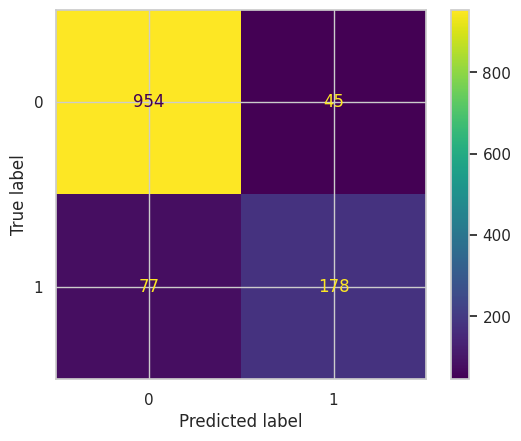

In [ ]:
print('Confusion Matrix')
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object and plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
disp.plot()
plt.show() # Add this line to display the plot

In [ ]:
from sklearn import metrics

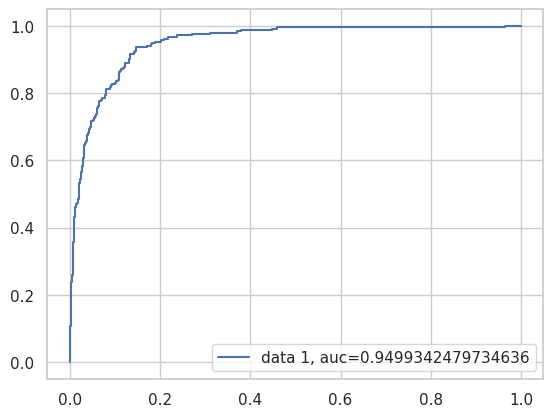

In [ ]:
y_pred_proba = log_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

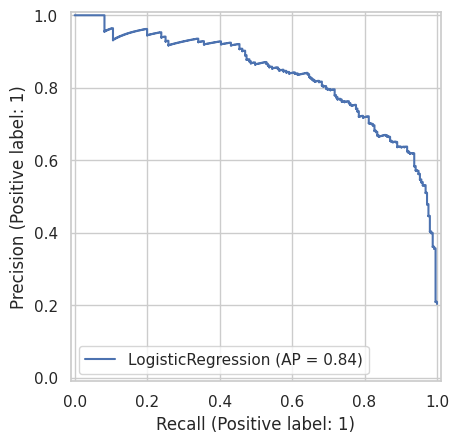

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

PrecisionRecallDisplay.from_estimator(log_model, X_test, y_test)
plt.show()

In [ ]:
#To calculate other metrics, we need to get the prediction results from the test dataset:
"""
predict_proba to get the predicted probability of the logistic regression for each class in the model.
The first column of the output of predict_proba is P(target = 0), and the second column is P(target = 1).
So we are calling for the second column by its index position 1.
predict the test dataset labels by choosing the class with the highest probability, which means a threshold of 0.5 in this binary example.

"""
test_prob = log_model.predict_proba(X_test)[:, 1]
test_pred = log_model.predict(X_test)

In [ ]:
from sklearn.metrics import log_loss, roc_auc_score, average_precision_score, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn import metrics

In [ ]:
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 0.22732
AUC = 0.94993
Average Precision = 0.83606

Using 0.5 as threshold:
Accuracy = 0.90271
Precision = 0.79821
Recall = 0.69804
F1 score = 0.74477

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       999
           1       0.80      0.70      0.74       255

    accuracy                           0.90      1254
   macro avg       0.86      0.83      0.84      1254
weighted avg       0.90      0.90      0.90      1254



# **Assumptions Check**

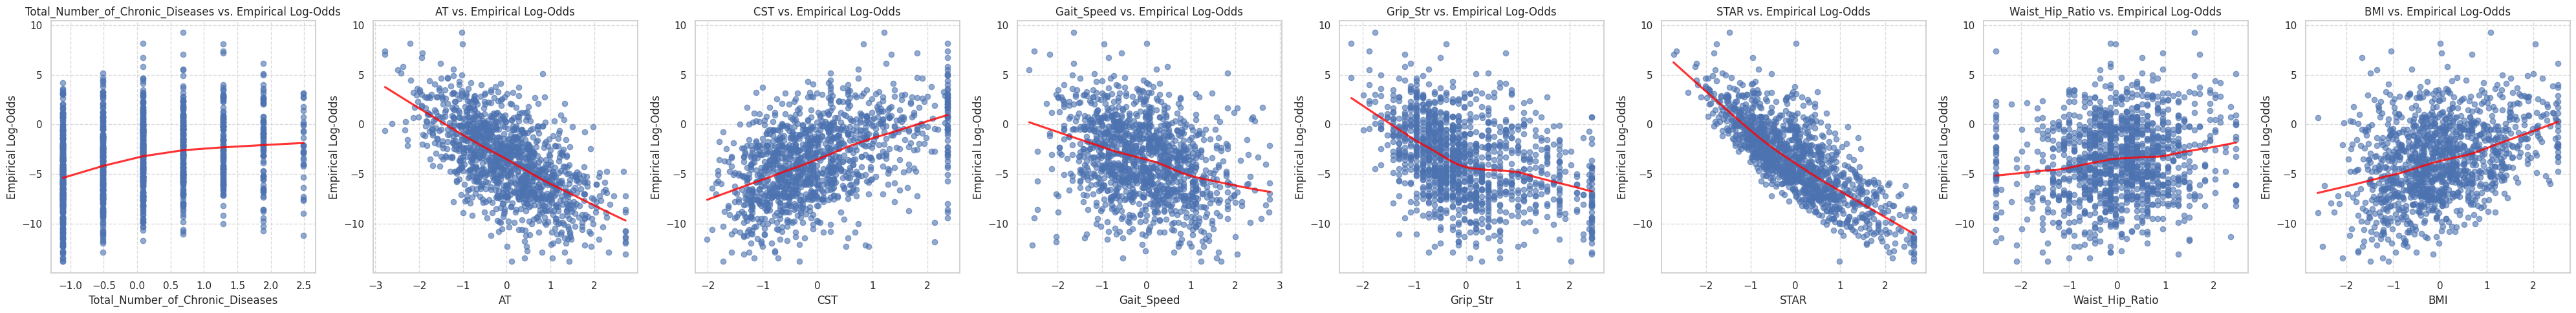

In [ ]:
# Calculate predicted probabilities using the test set features
# Replace 'data' with the correct variable name (X_test)
# Select the actual numerical columns for plotting
# Assuming 'numeric_cols_X' contains the names of the continuous numeric features in X_test

continuous_features = numeric_cols_X

if not continuous_features:
    print("No continuous numeric features found in X_test to plot assumptions.")
else:
    # Create a temporary DataFrame for plotting which includes the target variable
    # We need y_test as well for some potential assumption checks (though not directly used in this log-odds plot)
    # Let's create a combined df for plotting
    plot_data = X_test.copy()
    plot_data['Sarcopenia'] = y_test # Add the target variable back for context if needed

    # Calculate predicted probabilities using the log_model on the test set
    plot_data['predicted_prob'] = log_model.predict_proba(X_test)[:, 1]

    # Calculate empirical log-odds (logit)
    # Handle cases where predicted_prob is 0 or 1 to avoid log(0) or log(inf)
    # A small epsilon can be added/subtracted or clamp the values
    epsilon = 1e-10
    plot_data['empirical_log_odds'] = np.log((plot_data['predicted_prob'] + epsilon) / (1 - plot_data['predicted_prob'] + epsilon))

    # Plotting for each continuous predictor
    # Adjust figure size based on the number of continuous features
    num_plots = len(continuous_features)
    plt.figure(figsize=(5 * num_plots, 5))

    for i, col in enumerate(continuous_features):
        plt.subplot(1, num_plots, i + 1)
        sns.regplot(x=col, y='empirical_log_odds', data=plot_data, lowess=True,
                    line_kws={'color': 'red', 'alpha': 0.8}, scatter_kws={'alpha': 0.6})
        plt.xlabel(col)
        plt.ylabel("Empirical Log-Odds")
        plt.title(f"{col} vs. Empirical Log-Odds")
        plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

In [ ]:
# Independence of Observations
print("\n--- Checking Independence of Observations ---")
print("This assumption is primarily assessed by understanding your data collection method and study design.")
print("Consider the following questions:")
print("1. Are the observations truly distinct individuals or entities?")
print("2. Is there any temporal or spatial correlation in the data?")
print("3. Are there any known hierarchical structures (e.g., patients within hospitals, students within schools)?")
print("\nIf any of these suggest dependence, standard logistic regression might not be appropriate.")
print("You might need to consider advanced models like Mixed-Effects Logistic Regression or time-series specific models.")


--- Checking Independence of Observations ---
This assumption is primarily assessed by understanding your data collection method and study design.
Consider the following questions:
1. Are the observations truly distinct individuals or entities?
2. Is there any temporal or spatial correlation in the data?
3. Are there any known hierarchical structures (e.g., patients within hospitals, students within schools)?

If any of these suggest dependence, standard logistic regression might not be appropriate.
You might need to consider advanced models like Mixed-Effects Logistic Regression or time-series specific models.


The answers are:
1. Yes
2. No
3. No
Therefore standard logistic regression is ok for this data set.

# **Interpreting the Results**

Let’s interpret the results for our logistic regression model. We’ll cover both the categorical and the numerical features.

In [ ]:
# Analyze coefficients
# Get the column names from the training data used to fit the model
feature_names = X_train.columns

# Ensure the number of features in X_train matches the number of coefficients
if len(feature_names) != len(log_model.coef_[0]):
    print("Warning: Number of feature names does not match number of coefficients.")
    # You might want to investigate further if this warning appears

# Create the DataFrame with the intercept and coefficients
coefficients_df = pd.DataFrame({
    'variable': ['intercept'] + feature_names.tolist(), # Add intercept and convert column index to list
    'coefficient': np.hstack((log_model.intercept_, log_model.coef_[0])) # Combine intercept and coefficients
})

print(coefficients_df.sort_values(by='coefficient', key=abs, ascending=True))

                            variable  coefficient
29             Job_security_personel     0.012335
35               Work_Status_working    -0.018075
1   Total_Number_of_Chronic_Diseases     0.020122
16              Education_University    -0.024768
20      Chronic_Diseases_Hipotiroidi     0.062893
19     Chronic_Diseases_Dyslipidemia     0.070410
17              Education_illiterate     0.077864
9                           DM_Type2    -0.084165
4                         Gait_Speed    -0.089399
31                       Job_teacher     0.121429
21              Chronic_Diseases_KAH    -0.122122
13              Age_Group_AGE 80-100     0.124394
7                    Waist_Hip_Ratio     0.127547
10                                OP     0.165996
12               Age_Group_AGE 60-80     0.196405
37          Exercise_Status_3-4/week     0.219189
14          Education_Primary School     0.270004
22                        Job_farmer    -0.286496
18             Chronic_Diseases_COPD     0.347880


For categorical feature 'sex', this fitted model says that holding all the other features at fixed values, the odds of having sarcopenia disease for males (sex=1) to the odds of having sarcopenia disease for females is exp(5.623465) (that is 276,85 times).

For categorical feature 'Exercise_Status', we have created dummy variables for it, the reference value is (Exercise_Status_0). So the odds ratio of Exercise_Status_1-2/week to Exercise_Status_0 is exp(0.480896) is 1,61.

**Since the numerical variables are scaled by StandardScaler, we need to think of them in terms of standard deviations. Let’s first print out the list of numeric variable and its sample standard deviation.**

In [ ]:
pd.DataFrame(data={'variable': numeric_cols, 'unit': np.sqrt(scaler.var_)})

,variable,unit
0,Total_Number_of_Chronic_Diseases,1.666937
1,AT,8.294737
2,CST,3.164056
3,Gait_Speed,0.279869
4,Grip_Str,8.716575
5,STAR,0.310981
6,Waist_Hip_Ratio,0.092100
7,BMI,5.127113


In [ ]:
# Extract Coefficients and Statistics ---
result = log_model_sm
# Coefficients (B)
coefficients = result.params

# Standard Errors
std_errs = result.bse

# p-values
p_values = result.pvalues

# Odds Ratios (exp(B))
odds_ratios = np.exp(coefficients)

# 95% Confidence Intervals for Odds Ratios
# statsmodels provides CIs for coefficients (exp is needed for ORs)
conf_int_coef = result.conf_int(alpha=0.05) # 95% CI for coefficients
# Exp of CIs for ORs
conf_int_odds_ratios = np.exp(conf_int_coef)

# Rename the columns for clarity in the CI dataframe
conf_int_odds_ratios.columns = ['Lower CI', 'Upper CI']

# --- 5. Create the Table ---
# Combine all the extracted information into a DataFrame
table_data = pd.DataFrame({
    'Coefficient (B)': coefficients,
    'Std. Error': std_errs,
    'p-value': p_values,
    'Odds Ratio (exp(B))': odds_ratios,
    '95% CI for Odds Ratio': [f"[{row['Lower CI']:.2f}, {row['Upper CI']:.2f}]" for idx, row in conf_int_odds_ratios.iterrows()]
})

# Optional: Reorder columns and format p-value for display if needed
# For p-values, you might want to show them with specific precision or use scientific notation for very small values.
# Here, we'll keep it simple, similar to original image.

# Display the table
print("Table 4: Logistic Regression Model Coefficients and Odds Ratios (Dependent Variable: Sarcopenia)")
print(table_data)

Table 4: Logistic Regression Model Coefficients and Odds Ratios (Dependent Variable: Sarcopenia)
                                  Coefficient (B)  Std. Error        p-value  \
const                                   -5.670835    0.312745   1.766084e-73   
Total_Number_of_Chronic_Diseases         0.019079    0.080836   8.134199e-01   
AT                                      -2.784336    0.129027  2.800595e-103   
CST                                      1.036145    0.078849   1.919942e-39   
Gait_Speed                              -0.071096    0.081784   3.846746e-01   
Grip_Str                                -1.646649    0.122776   5.158726e-41   
Waist_Hip_Ratio                          0.130804    0.072405   7.083099e-02   
BMI                                      1.903670    0.099359   8.049359e-82   
DM_Type2                                -0.080572    0.169142   6.338201e-01   
OP                                       0.184707    0.158254   2.431491e-01   
Gender_M               

BMI variable is a highly significant positive predictor of sarcopenia (p = 0.000). Its Odds Ratio is 6.71. This indicates that for every one-unit increase in BMI, the odds of an individual having sarcopenia increase by a factor of 6.71, or a 570% increase in odds.

Grip_Str variable is a highly significant negative predictor of sarcopenia (p = 0.000). Its Odds Ratio is 0.19. This indicates that for every one-unit increase in Grip_Str (e.g., kg), the odds of an individual having sarcopenia decrease by a factor of 0.19, or a 81% reduction in odds (1 - 0.19 = 0.81). This finding underscores the critical role of pyhsical condition in sarcopenia prevention.

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
table_data.to_excel('logistic_regression_results2.xlsx', index=False)

In [ ]:
df.to_excel('/content/drive/MyDrive/PROJECTS/Sarcopenia_Project/Data_Set_Files_2/sarcopenia-data-set_columns_corrected_11.xlsx', index=False)